In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve, root
from scipy.integrate import solve_ivp
import time

c: [0. 0. 0. 0.]
cbefore: [1. 0. 0. 0.]
c: [4.e-06 0.e+00 0.e+00 0.e+00]
cbefore: [1.e+00 4.e-06 0.e+00 0.e+00]
c: [0. 0. 0. 0.]
cbefore: [1. 0. 0. 0.]
c: [1.49011612e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00]
cbefore: [1.00000000e+00 1.49011612e-14 0.00000000e+00 0.00000000e+00]
c: [0.00000000e+00 1.49011612e-14 0.00000000e+00 0.00000000e+00]
cbefore: [1.00000000e+00 0.00000000e+00 1.49011612e-14 0.00000000e+00]
c: [0.00000000e+00 0.00000000e+00 1.49011612e-14 0.00000000e+00]
cbefore: [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.49011612e-14]
c: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.49011612e-14]
cbefore: [1. 0. 0. 0.]
c: [0.00011892 0.         0.         0.        ]
cbefore: [1.00000000e+00 1.18920712e-04 0.00000000e+00 0.00000000e+00]
c: [1.18908778e-04 1.19318967e-08 1.19730570e-12 1.20143594e-16]
cbefore: [1.00000000e+00 1.18908778e-04 1.19318967e-08 1.19730570e-12]
c: [2.37817557e-04 2.38637934e-08 2.39461141e-12 2.40287188e-16]
cbefore: [1.00000000e+00 2.3781

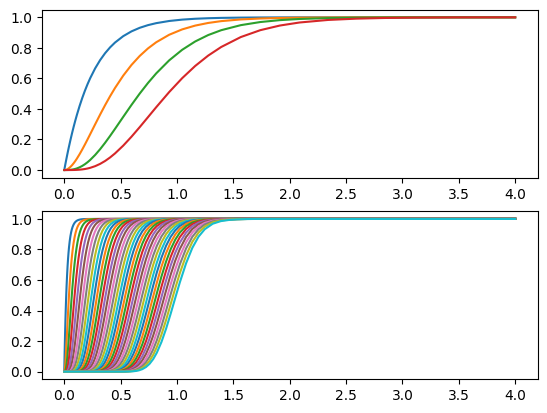

In [8]:
def tankseries(t, c, dd):
    # TWOTANKS is a model of two tank in series describing the concentration variation
    c_before = np.hstack((dd['cin'],c[:-1]))
    print(f"c: {c}")
    print(f"cbefore: {c_before}")

    dcdt = dd['q']/dd['Vn']*(c_before - c)
    return dcdt

def generalTankSeries(Vtot,N):
    tspan = [0, 4]
    yinit = np.zeros(N) #Initial values for c1 and c2.

    dd['Vn'] = Vtot/N
    
    #Simulation
    tic = time.time()
    sol = solve_ivp(lambda t, c: tankseries(t, c, dd), tspan, yinit, method = 'BDF')
    toc = time.time() - tic
    print(f'{len(sol.t)} steps {toc*1000:.2f} ms')
    return sol

# Parameters
dd = {}
dd['q'] = 1.0
dd['cin'] = 1.0

plt.figure(1)

plt.subplot(2,1,1)
sol = generalTankSeries(Vtot=1,N=4)
plt.plot(sol.t,sol.y.T)

plt.subplot(2,1,2)
sol = generalTankSeries(Vtot=1,N=40)
plt.plot(sol.t,sol.y.T)

plt.show(block=False)